In [65]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [66]:
data = pd.read_csv('Gold_data.csv')

In [67]:
data['date'] = pd.to_datetime(data['date'])
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [72]:
data['Price'] = data['price']
data['DATE'] = data['date']

In [73]:
data.dtypes


date     datetime64[ns]
price           float64
Price           float64
DATE     datetime64[ns]
dtype: object

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
 2   Price   2182 non-null   float64       
 3   DATE    2182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 68.3 KB


In [75]:
data.describe()

,price,Price
count,2182.000000,2182.000000
mean,3284.450046,3284.450046
std,719.564434,719.564434
min,2252.600000,2252.600000
25%,2697.020000,2697.020000
50%,2879.800000,2879.800000
75%,4147.325000,4147.325000
max,4966.300000,4966.300000


### Check for normality in data

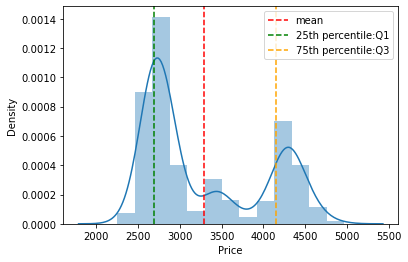

In [76]:
sns.distplot(data['Price'])
plt.axvline(x=np.mean(data['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

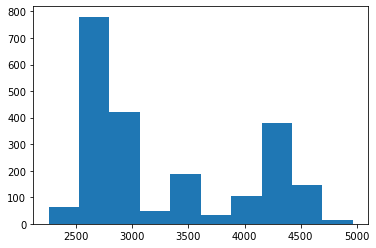

In [77]:
plt.hist(data["Price"])
plt.show()

### Find Outliers in data

<AxesSubplot:>

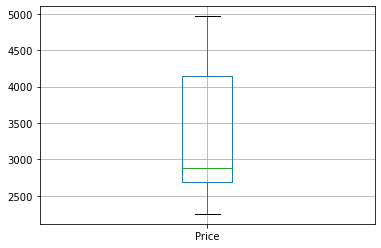

In [78]:
data.boxplot(column=["Price"])

### Check Trend in data

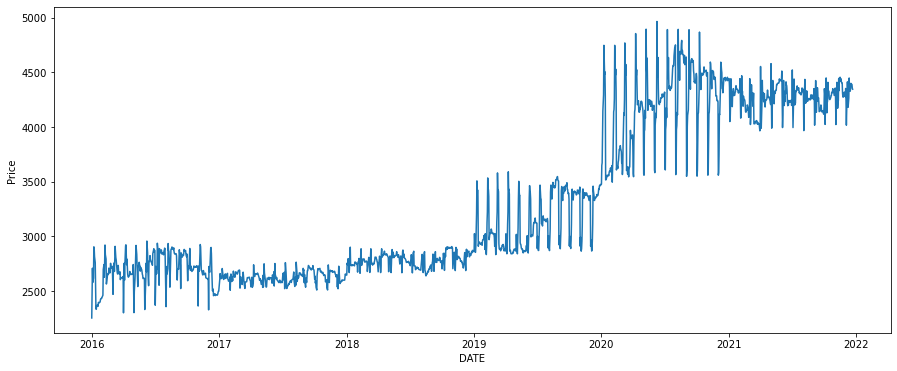

In [83]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='DATE',y='Price',data=data)
#plt.show(series1)
plt.savefig('C:\\Users\\priya\\Desktop\\img1',dpi = 300 , bbox_inches = 'tight')

#### This data have irregular trend with combination of linear & constant treand over the time

### Check trend using plotly lib

In [80]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=data['DATE'],y=data['Price'], mode='lines'))
fig.show()
plt.savefig('C:\\Users\\priya\\Desktop\\img1')

<Figure size 432x288 with 0 Axes>

##### mode='lines', If we set the mode='markers', then we’ll have a regular scatter (dots) plot. There’s also another mode='lines+markers' that shows both dots and lines
These charts are interactive, you can hover the mouse over the chart and see the price details

### Using calplot (Visualization like GITHUB)

In [53]:
import calplot
#assigning date column as its index
df=data
df=df.set_index('DATE')

#visualize time series

calplot.calplot(df['Price'],edgecolor=None)

ModuleNotFoundError: No module named 'calplot'

### Trend & Seasonality using Seaborn lib

<Figure size 1440x576 with 0 Axes>

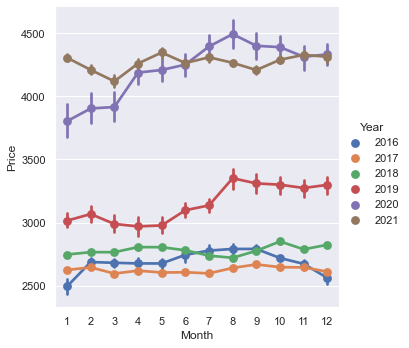

In [88]:
plt.figure(figsize = (20,8))
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
sns.factorplot(data = data, x ="Month", y = "Price", hue = "Year")
sns.set(rc={'figure.figsize':(20,25)})

#### Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [92]:
df=data
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['weekday'] = df['DATE'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = data[['Price','Year']].groupby(by='Year').sum().reset_index()

df_year

,Year,Price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


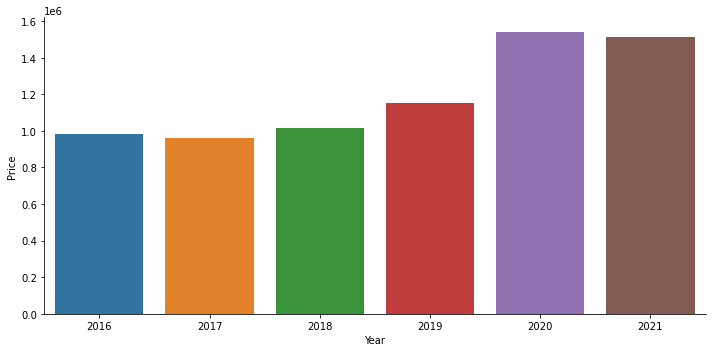

In [56]:
sns.catplot(x='Year',y='Price',data=df_year,kind='bar',aspect=2)

### Monthly & Yeary Gold Price (TREND & SEASONALITY)

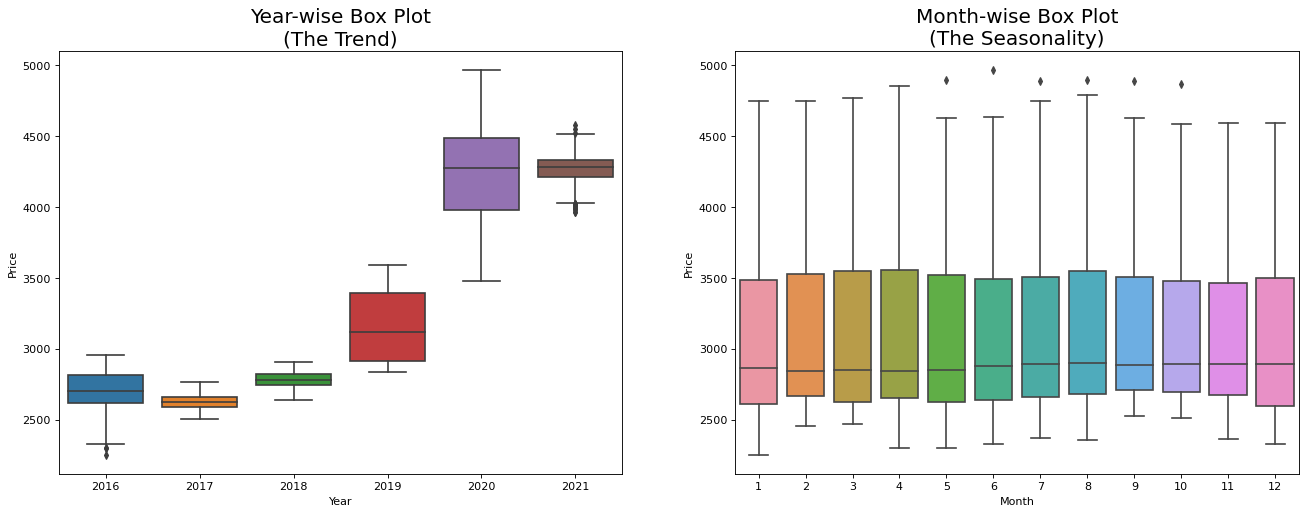

In [57]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Price', data=data, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=data.loc[~data.Year.isin([2018, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

##### Inference: From the number of sales vs. year plot, we can infer an increasing trend over the years. The aggregate number of sales has increased from approximately 32000 in 2018 to slightly over 52000 in 2020. A clear trend is captured by the lineplot above

### Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

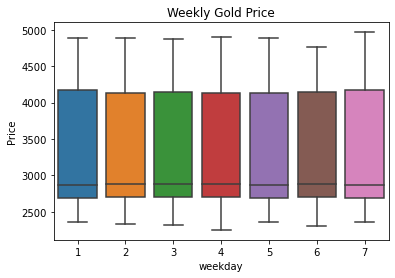

In [58]:
plot = sns.boxplot(x='weekday', y='Price', data=df)
plot.set(title='Weekly Gold Price')

### Time Series Decomposition Plot

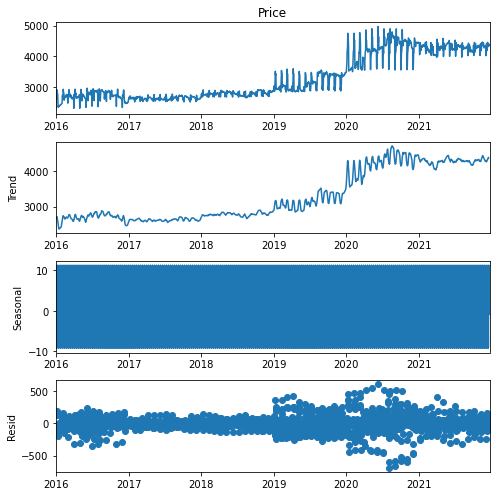

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

data=data.set_index('DATE')

df1=data.sort_values(by='DATE', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(df1.Price, period=10, model='additive')
decompose.plot()
plt.show() 

 Determine Error, Trend and Seasonality An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre components.

 Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

 Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

 Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

### Check Stationarity of a Time Series

In [60]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

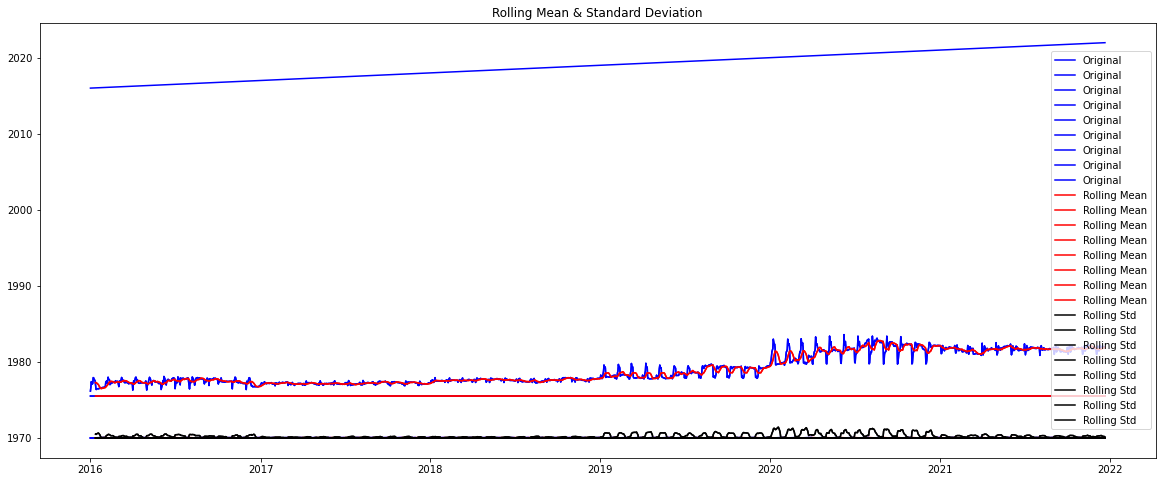

In [62]:
plt.figure(figsize = (20,8))
test_stationarity(data)
plt.show()

 Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series